# 对比两个模型在Q mean的拟合精度

## 导入依赖

In [5]:
import json
import os
import sys

import numpy as np
import pandas as pd
from dotenv import load_dotenv

load_dotenv()
sys.path.append(os.getenv("PROJ_PATH")) # type: ignore

from dmg.core.post.plot_baseflowindex_scatter import \
    plot_baseflow_scatter  # noqa
from project.better_estimate import load_config  # noqa

## 读取并计算两个模型的Qmean

In [6]:
lstm_config = load_config(r"conf/config_dhbv_lstm.yaml")
hopev1_config = load_config(r"conf/config_dhbv_hopev1.yaml")
lstm_out_path = lstm_config["out_path"]
hopev1_out_path = hopev1_config["out_path"]

lstm_flow = np.load(
    os.path.join(lstm_out_path, "streamflow.npy"), allow_pickle=True
)
hopev1_flow = np.load(
    os.path.join(hopev1_out_path, "streamflow.npy"), allow_pickle=True
)

lstm_qmean = lstm_flow.mean(axis=0)[:, 0]
hopev1_qmean = hopev1_flow.mean(axis=0)[:, 0]

print("LSTM GWFlow sample:", lstm_qmean.shape)
print("Hope GWFlow sample:", hopev1_qmean.shape)

LSTM GWFlow sample: (531,)
Hope GWFlow sample: (531,)


## 读取流域信息中记录的Baseflow index

In [7]:
data_path = os.getenv("DATA_PATH", "")
gage_ids = np.load(os.path.join(data_path, "gage_id.npy"), allow_pickle=True)
hydroinfos = pd.read_csv(os.path.join(data_path, "camels_hydro.txt"), sep=";")
subset_path = os.path.join(data_path, "531sub_id.txt")
with open(subset_path) as f:
    selected_basins = json.load(f)
selected_basins = [int(basin_id) for basin_id in selected_basins]
selected_hydroinfos = hydroinfos[hydroinfos["gauge_id"].isin(selected_basins)]
real_qmean = np.array(selected_hydroinfos.q_mean.tolist())
print("Real baseflow index sample:", real_qmean.shape)

Real baseflow index sample: (531,)


## 绘制模型相关图

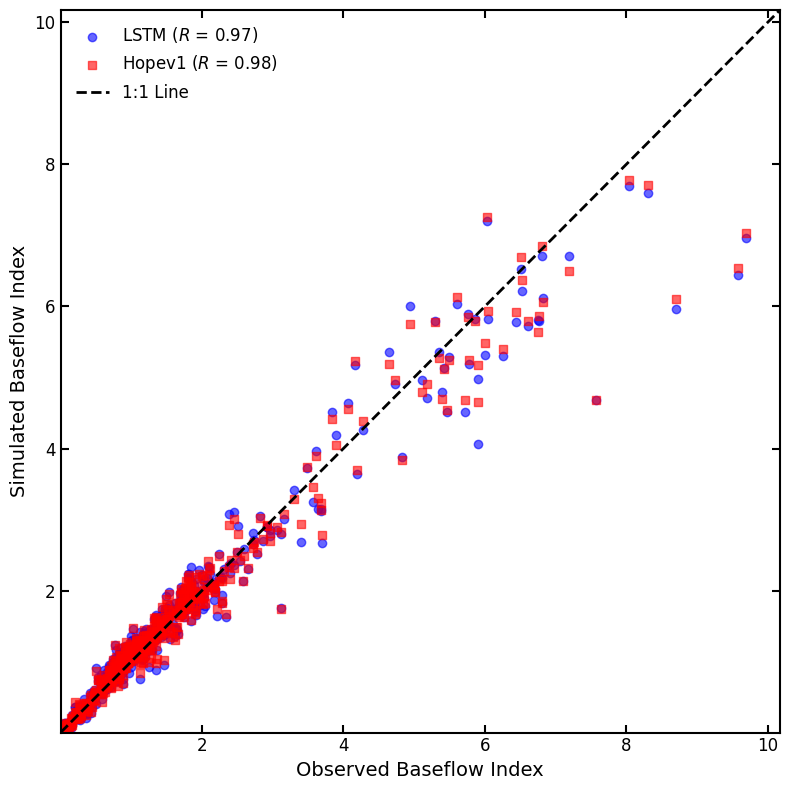

In [8]:
plot_baseflow_scatter(
    real_qmean,
    lstm_qmean,
    hopev1_qmean,
)